<a href="https://colab.research.google.com/github/android-kunjapppan/PyTorch-Tutorial/blob/master/PyTorch_Feed_Forward_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device Config

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Paramaters

In [3]:
input_size = 784 # since, image size is 28*28
hidden_size = 100
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

# MNIST

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

# DataLoader

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size=batch_size,shuffle =True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size=batch_size,shuffle =False)

* Looking at one batch of the data

In [8]:
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


# PLotting the data


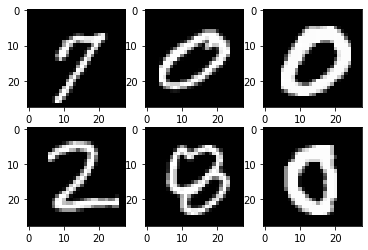

In [9]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0],cmap='gray')

plt.show()

# Feed Forward Neural Network

In [11]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
     super(NeuralNet,self).__init__()
     self.l1 = nn.Linear(input_size,hidden_size)
     self.relu = nn.ReLU()
     self.l2 = nn.Linear(hidden_size,num_classes)


  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out) # No softmax in the output layer Because we apply cross-entropy loss which includes softmax
    return out
  


In [12]:
model = NeuralNet(input_size,hidden_size,num_classes)

# Loss and Optimizer


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

# Training Loop

In [17]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    # Since the batch of images shape = (100,1,28,28)
    # So the tensor needs the size = (100,784)

    # Reshaping the tensor and pushing it to GPU
    images = images.reshape(-1,28*28)

    # Forward Pass
    outputs = model(images)
    loss = criterion(outputs,labels)

    # Backward PAss
    optimizer.zero_grad() # TO empty the values inthe gradient attribute
    loss.backward()
    optimizer.step() # Updates the parameters


    if (i+1)%100==0:
      print(f'epoch {epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss= {loss.item():.4f}')


epoch 1/3,step 100/600,loss= 0.4712
epoch 1/3,step 200/600,loss= 0.3752
epoch 1/3,step 300/600,loss= 0.4270
epoch 1/3,step 400/600,loss= 0.1235
epoch 1/3,step 500/600,loss= 0.3050
epoch 1/3,step 600/600,loss= 0.1738
epoch 2/3,step 100/600,loss= 0.2438
epoch 2/3,step 200/600,loss= 0.1581
epoch 2/3,step 300/600,loss= 0.2731
epoch 2/3,step 400/600,loss= 0.1820
epoch 2/3,step 500/600,loss= 0.2369
epoch 2/3,step 600/600,loss= 0.1266
epoch 3/3,step 100/600,loss= 0.1082
epoch 3/3,step 200/600,loss= 0.1767
epoch 3/3,step 300/600,loss= 0.1605
epoch 3/3,step 400/600,loss= 0.1583
epoch 3/3,step 500/600,loss= 0.1052
epoch 3/3,step 600/600,loss= 0.1510


# Testing/

In [18]:
with torch.no_grad():
  n_correct =0
  n_samples =0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28)
    outputs = model(images)

    # torch.max() will return value,index
    _,predictions = torch.max(outputs,1)
    n_samples +=labels.shape[0]
    n_correct = (predictions == labels).sum().item()


    acc = 100.0 * n_correct/n_samples

In [19]:
print(acc)

0.97
